In [1]:
from email_report import *
from models import find_chgpts
import matplotlib.pyplot as plt

In [2]:
# Generate random data
xs = [np.random.randn(np.random.randint(10, 20)) + mean for mean in [10, 14, 8, 11]]
x = np.concatenate(xs)
t = range(len(x))

alpha = 0.005

Text(0, 0.5, 'Values')

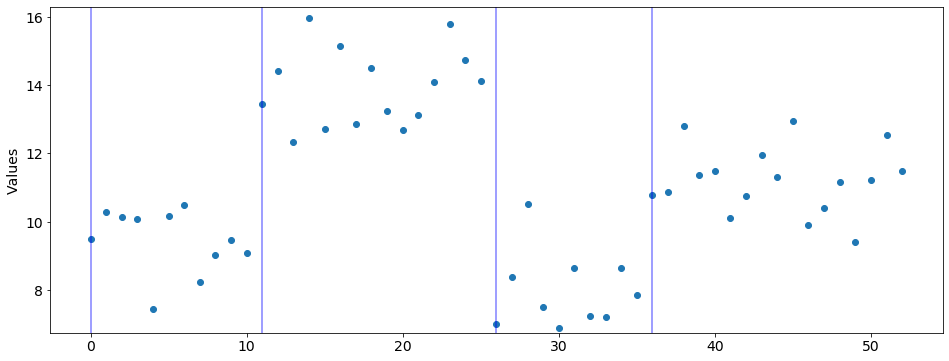

In [3]:
# Test changepoint detector
chgpts, detpts, votes = find_chgpts(x, alpha=alpha, num_test=5)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))

plt.scatter(np.arange(len(x)), x)
# plt.xlim(0, len(x))
plt.ylim(x.min()*.98,x.max()*1.02)
plt.vlines(chgpts, x.min()-1, x.max()+1, color='blue', alpha=.5)
plt.ylabel('Values')

0 pass, 9.50, 9.50, 0.00
1 pass, 10.29, 9.89, 0.40
2 pass, 10.15, 9.98, 0.34
3 pass, 10.07, 10.00, 0.30
4 pass, 7.46, 9.49, 1.05
5 pass, 10.16, 9.60, 0.99
6 pass, 10.48, 9.73, 0.97
7 pass, 8.22, 9.54, 1.03
8 pass, 9.03, 9.48, 0.99
9 pass, 9.45, 9.48, 0.94
10 pass, 9.10, 9.45, 0.90
11 pass, 13.45, 9.78, 1.40
12 warn, 14.42, 10.14, 1.83
13 warn, 12.33, 10.29, 1.85
14 fail, 15.98, 10.67, 2.28
15 pass, 12.70, 13.78, 1.31
16 pass, 15.14, 14.00, 1.30
17 pass, 12.85, 13.84, 1.27
18 pass, 14.50, 13.92, 1.21
19 pass, 13.25, 13.85, 1.16
20 pass, 12.68, 13.73, 1.15
21 pass, 13.11, 13.67, 1.11
22 pass, 14.09, 13.71, 1.07
23 pass, 15.78, 13.87, 1.17
24 pass, 14.74, 13.93, 1.15
25 pass, 14.12, 13.94, 1.11
26 pass, 6.99, 13.51, 2.00
27 pass, 8.38, 13.21, 2.28
28 pass, 10.52, 13.06, 2.30
29 pass, 7.49, 8.35, 1.35
30 pass, 6.89, 8.05, 1.34
31 pass, 8.64, 8.15, 1.24
32 pass, 7.25, 8.02, 1.19
33 pass, 7.20, 7.92, 1.15
34 pass, 8.64, 8.00, 1.11
35 pass, 7.84, 7.99, 1.05
36 pass, 10.77, 8.24, 1.28
37 pass,

(5.886189684243569, 16.975871949613428)

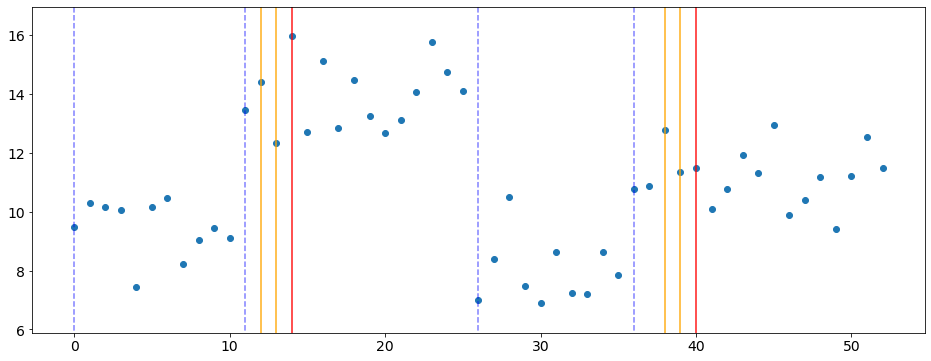

In [4]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))
for i in range(len(x)):
    output = changepoint_test(x[:i+1], alpha)
    if output[0] == 'warn':
        plt.vlines(i, -100, 100, color='orange', alpha=.9)
    if output[0] == 'fail':
        plt.vlines(i, -100, 100, color='red', alpha=.9)
    print(i, '%s, %.2f, %.2f, %.2f' % output)
    
plt.scatter(np.arange(len(x)), x)
plt.vlines(chgpts, -100, 100, color='blue', alpha=.5, linestyles='dashed')
plt.ylim(x.min()-1, x.max()+1)